<a href="https://colab.research.google.com/github/gbiamgaurav/Tensorflow/blob/main/Basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_labels.shape

(10000,)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

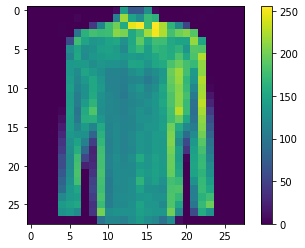

In [12]:
plt.figure()
plt.imshow(train_images[140])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [14]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

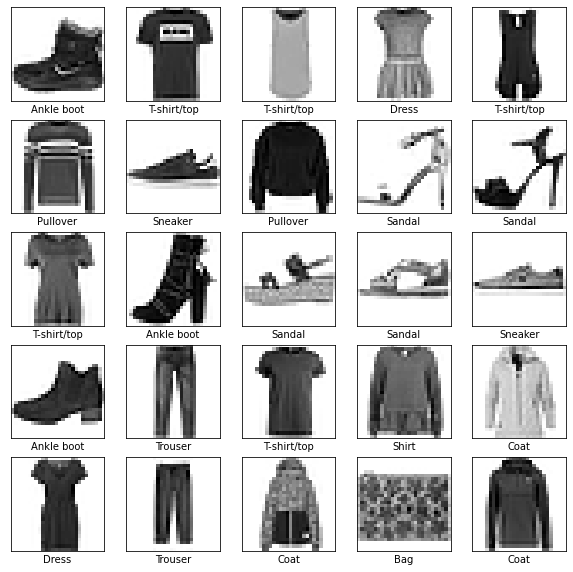

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9722
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0761 - accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0724 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0758 - accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0708 - accuracy: 0.9732
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0715 - accuracy: 0.9729
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0714 - accuracy: 0.9734
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0715 - accuracy: 0.9731
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9741
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.069

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6690 - accuracy: 0.8878 - 351ms/epoch - 1ms/step

Test accuracy: 0.8877999782562256


In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
type(probability_model)

keras.engine.sequential.Sequential

In [29]:
predictions = probability_model.predict(test_images)

In [30]:
type(predictions)

numpy.ndarray

In [35]:
predictions[0]

array([7.4640432e-38, 3.2017819e-23, 1.4624861e-31, 0.0000000e+00,
       4.8228572e-33, 4.7250849e-14, 8.5966319e-31, 3.9909114e-08,
       5.6171203e-29, 1.0000000e+00], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [37]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [38]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

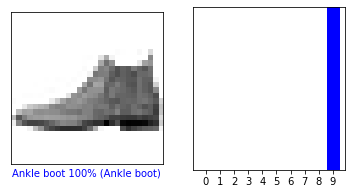

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

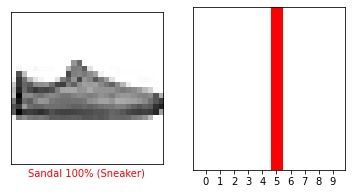

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

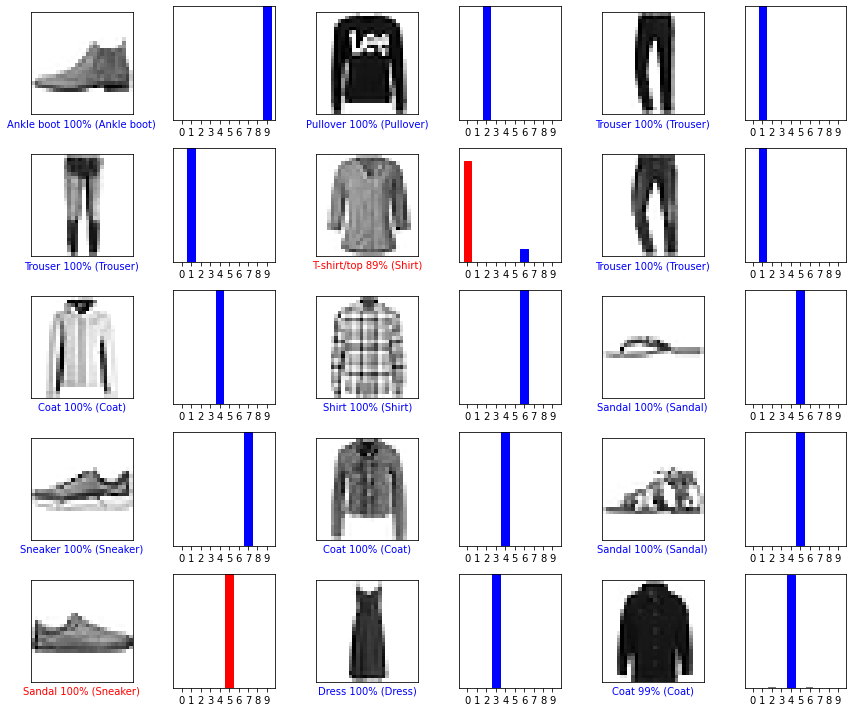

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [42]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [43]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [44]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.7272380e-05 3.6246739e-23 9.9991894e-01 2.2680424e-34 3.7935392e-06
  7.1928420e-15 6.2546461e-09 5.2163186e-33 5.9800417e-24 3.6382366e-30]]


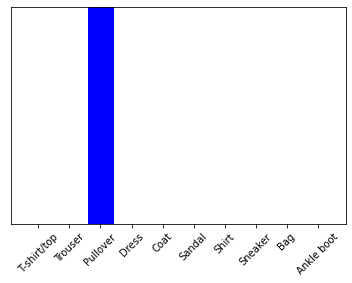

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [46]:
np.argmax(predictions_single[0])

2